In [7]:
import numpy as np
from sklearn.svm import SVC  # "Support Vector Classifier"
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Data

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)

## Train model & prediction

In [12]:
model = SVC(kernel='linear')
model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_predict = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

1.0


## Visualization

In [108]:
# Plot hyperplane with margin
def plot_svc_decision(clf):
    ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)
    
    # plot the margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

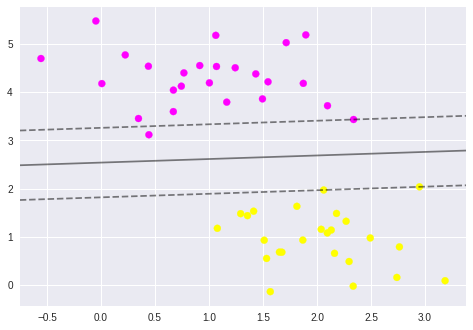

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')
plot_svc_decision(model)

## SVM Non-linear case

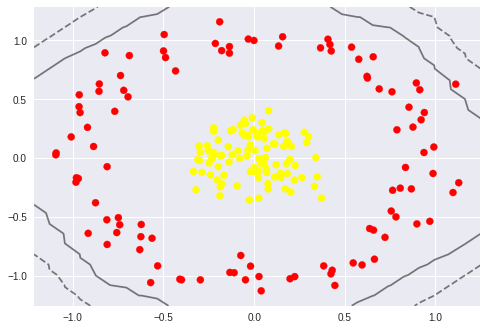

In [124]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(200, factor=.2, noise=.1)

model = SVC(kernel='poly',degree = 100,C=1000)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)

## Multi-classification 

In [105]:
# Plot predict zones.
def plot_svc_predict(X,clf):
    # step size in the mesh
    num = 200
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, num),np.linspace(y_min, y_max, num))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

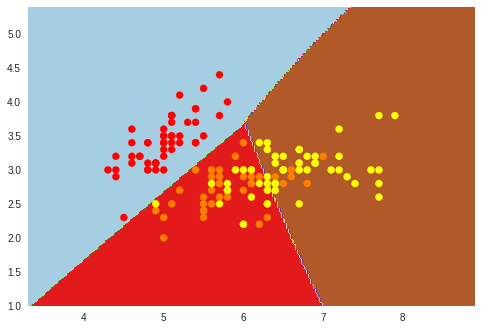

In [128]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
y = iris.target
    
model = svm.SVC(kernel='rbf',gamma=0.1)
model.fit(X, y)

plot_svc_predict(X,model)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


## Theory

In [ ]:

SVM : is used for the classification problem. it will create a hyperplane separating the place into two parts.
    The support vectors are points closes to the hyperplane.
    The margin is the distant between support vectors and the hyperplane.
    The optimal hyperplane will maximize margin.
    
SVM : is useful for clear margin problem, multi-dimensional spaces, efficient memory.
    But is not pratical for the overlap case, is time-consuming train, 
    
Implementation: 
    - Data processing (data quantification, data visualization, data normalization, train-test-data creation)
    - Sklearn : import SVC, metrics, predict
    - Plot : data and decision/predict.
       


C is penalty parameter, i.e. the trade-off between erros on training data set and margin maximization. 
A smaller C will allow more erros (misclassification) and usually produce larger margin.
When C goes to infinity, SVM becomes a hard-margin.


gamma: when gamma small is resulting in a smooth decision boundary, losely fit the data.
       whereas a higher value of gamma will exactly fit the training dataset, which causes overfitting
      
    
    


## Take note

In [ ]:
SVM : 
from sklearn.svm import SVC # "Support vector classifier"
from sklearn import metrics


model = SVC(kernel='linear')
model = SVC(kernel='poly',degree = 3)
model = svm.SVC(kernel='rbf',gamma=0.1) - gaussian kernel / radial basis function kernel


model.fit(X_train, y_train) 

y_predict = model.predict(X_test)

metrics.accuracy_score(y_test, y_predict)
